# Logistic Regression

## How it works
Standard linear model:

$y_i=\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}+e_i,  \;\;\;\; e_i \sim N(0, \sigma^2)$

The mean of expected value of the response is:

$\mathbb{E}(y_i)=\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}=\eta_i$

In a GLM, there is a link function g between $\eta$ and the mean of the response variable: $g(\mathbb{E}(y_i))=\eta_i$. The corresponding link function is called the logit function

* __Logit function__

$\eta=g(p)=log(\frac{p}{1-p})$

It is the log of the odds. Regression under this model is called logistic regression. It we write out the fitted model for the log odds, it would be like:
$log\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}=\beta_0+\beta_1X_1+...\beta_nX_n$

* __Sigmoid function__

$p=\mathbb{E}y=\mathbb{P}{(y=1)}=\frac{e^\eta}{1+e^\eta}=\frac{1}{1+e^{-\eta}}$

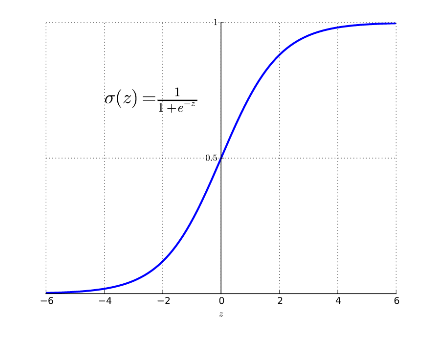

In [1]:
from IPython.display import Image
Image(filename='sigmoid.png')

* __Prediction__

$\hat{y}=\left\{
                \begin{array}{ll}
                 0      & \text{if } \hat{p}<0.5,\\
                 1      & \text{if } \hat{p}\geq0.5.
                \end{array}
              \right.
$

* __Cost Function of a single training instance__

$c(\theta)=\left\{
                \begin{array}{ll}
                  -log(\hat{p})       & \text{if } y=1\\
                  -log(1-\hat{p})     & \text{if } y=0
                \end{array}
              \right.
$

* __Log Loss (over the whole training set)__

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

## Assumption
* Target variable is binary
* Features are independent of one another. That is, the model should have little or no multicollinearity.
* Sample size is adequate (It uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, and thus relies on large-sample approximations.)
* The independent variables are linearly related to the log odds.
* Errors need to be independent but NOT normally distributed.

## Performance Measures
* __Precision__

$precision=\frac{TP}{TP+FP}$

* __Recall__

$recall=\frac{TP}{TP+FN}$

* __$F_1$ score__

The F1 score is the harmonic mean of precision and recall.

$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2\times\frac{precision\times recall}{precision+recall}$

* __The ROC Curve__

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive.


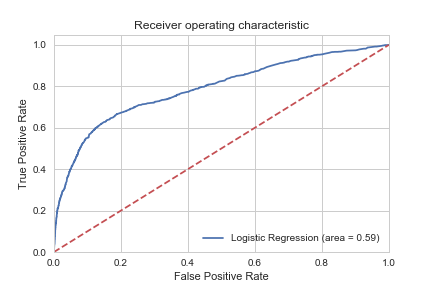

In [1]:
from IPython.display import Image
Image(filename='Log_ROC.png')

Once again there is a tradeoff: the higher the recall (TPR), the more false positives(FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

The ROC curve is more informative than the classification table since it summarizes the predictive power for all possible threshold $\pi_0$.

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.

* __ROC AUC score__

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

## Pros and Cons
### Pros

* low variance
* provides probabilities for outcomes
* works well with diagonal (feature) decision boundaries
* NOTE: logistic regression can also be used with kernel methods

### Cons
* high bias

## Interpreting Parameters